Dataset Shape: (303, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-nul

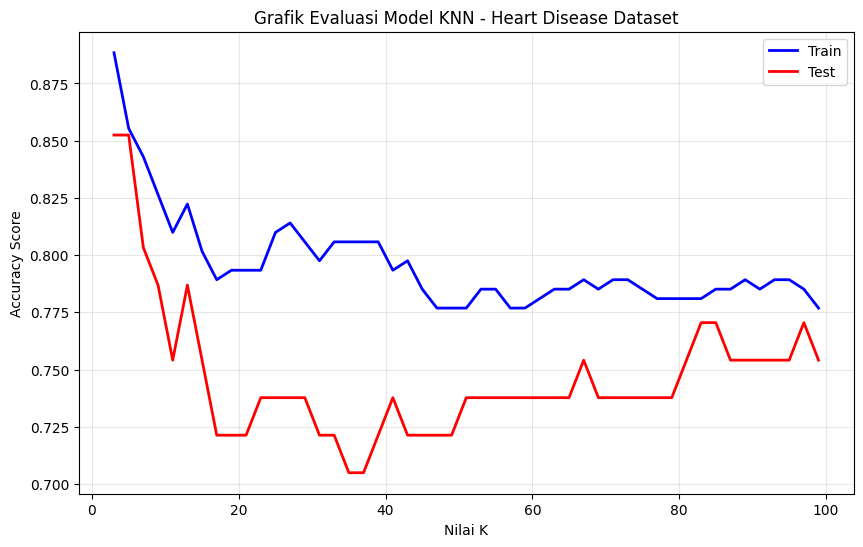


=== HASIL TUNING ===
K terbaik (Train): 3 dengan akurasi 0.8884
K terbaik (Test):  3 dengan akurasi 0.8525

FINAL MODEL WITH BEST K

Final Model dengan K=3

Report Klasifikasi - Train Set:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       110
           1       0.89      0.91      0.90       132

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242

Report Klasifikasi - Test Set:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


KESIMPULAN
1. Scaling meningkatkan performa model
2. Hyperparameter tuning mengoptimalkan nilai K
3. Model terbaik menggunak

In [22]:
# TUGAS - Improvement Model: Encoding & Scaling
# KNN Classification Model - Dataset Heart Disease

# ============================================
# 1. IMPORT PACKAGES
# ============================================
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report as cr, accuracy_score
import matplotlib.pyplot as plt

# ============================================
# 2. DATA LOADING
# ============================================
path = "https://raw.githubusercontent.com/asepmuhidin/AI-UPB/refs/heads/main/dataset/heart.csv"
df = pd.read_csv(path)
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# ============================================
# 3. PREPROCESSING
# ============================================

# Cek data kosong
print("\n=== Checking Missing Values ===")
print(df.isnull().sum())

# Dataset heart tidak ada data kosong, jadi tidak perlu fillna
# Tidak ada kolom yang perlu di-drop

# Cek tipe data
print("\n=== Data Types ===")
print(df.dtypes)

# Dataset heart sudah dalam bentuk numerik semua, tidak perlu encoding
# Semua kolom sudah berupa integer/float

print("\n=== Dataset after preprocessing ===")
print(df.head())

# ============================================
# 4. DATA SPLITTING
# ============================================
y = df['target']
X = df.drop('target', axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y, random_state=100
)
print(f"\nJumlah data train: {x_train.shape[0]} dan data test: {x_test.shape[0]}")

# ============================================
# 5. SIMPLE MODELING (WITHOUT SCALING)
# ============================================
print("\n" + "="*50)
print("SIMPLE MODELING (WITHOUT SCALING)")
print("="*50)

# Training model
model = KNeighborsClassifier()
model.fit(x_train, y_train)

# Prediksi
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Report Klasifikasi
rpt_train = cr(y_train, y_pred_train)
rpt_test = cr(y_test, y_pred_test)

print("\nReport Klasifikasi model terhadap data Train (Without Scaling)")
print(rpt_train)
print("="*60)
print("Report Klasifikasi model terhadap data Test (Without Scaling)")
print(rpt_test)

# Simpan accuracy untuk perbandingan
acc_train_no_scale = accuracy_score(y_train, y_pred_train)
acc_test_no_scale = accuracy_score(y_test, y_pred_test)

# ============================================
# 6. FEATURE IMPROVEMENT (SCALING)
# ============================================
print("\n" + "="*50)
print("FEATURE IMPROVEMENT WITH SCALING")
print("="*50)

# Scaling semua kolom numerik (semua kolom kecuali target)
numeric_cols = X.columns.tolist()
print(f"\nKolom yang akan di-scale: {numeric_cols}")

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n=== Dataset after scaling ===")
print(df_scaled.head())

# ============================================
# 7. DATA SPLITTING (SCALED DATA)
# ============================================
y = df_scaled['target']
X = df_scaled.drop('target', axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y, random_state=100
)
print(f"\nJumlah data train: {x_train.shape[0]} dan data test: {x_test.shape[0]}")

# ============================================
# 8. MODELING WITH SCALING
# ============================================
print("\n" + "="*50)
print("MODELING WITH SCALING")
print("="*50)

# Training model
model = KNeighborsClassifier()
model.fit(x_train, y_train)

# Prediksi
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Report Klasifikasi
rpt_train = cr(y_train, y_pred_train)
rpt_test = cr(y_test, y_pred_test)

print("\nReport Klasifikasi model terhadap data Train (With Scaling)")
print(rpt_train)
print("="*60)
print("Report Klasifikasi model terhadap data Test (With Scaling)")
print(rpt_test)

# Simpan accuracy untuk perbandingan
acc_train_with_scale = accuracy_score(y_train, y_pred_train)
acc_test_with_scale = accuracy_score(y_test, y_pred_test)

# ============================================
# 9. COMPARISON
# ============================================
print("\n" + "="*50)
print("COMPARISON: WITHOUT vs WITH SCALING")
print("="*50)
print(f"Train Accuracy (Without Scaling): {acc_train_no_scale:.4f}")
print(f"Train Accuracy (With Scaling):    {acc_train_with_scale:.4f}")
print(f"Improvement:                       {acc_train_with_scale - acc_train_no_scale:.4f}")
print()
print(f"Test Accuracy (Without Scaling):  {acc_test_no_scale:.4f}")
print(f"Test Accuracy (With Scaling):     {acc_test_with_scale:.4f}")
print(f"Improvement:                       {acc_test_with_scale - acc_test_no_scale:.4f}")

# ============================================
# 10. TUNING PARAMETER IMPROVEMENT
# ============================================
print("\n" + "="*50)
print("HYPERPARAMETER TUNING (K NEIGHBORS)")
print("="*50)

# Tuning parameter jumlah tetangga (K)
n = range(3, 100, 2)
eval_train, eval_test = [], []

for k in n:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    eval_train.append(accuracy_score(y_train, y_pred_train))
    eval_test.append(accuracy_score(y_test, y_pred_test))

# Grafik evaluasi
plt.figure(figsize=(10, 6))
plt.title("Grafik Evaluasi Model KNN - Heart Disease Dataset")
plt.ylabel("Accuracy Score")
plt.xlabel("Nilai K")
plt.plot(n, eval_train, c='b', label='Train', linewidth=2)
plt.plot(n, eval_test, c='r', label='Test', linewidth=2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Nilai K terbaik berdasarkan hasil tuning
best_train_index = eval_train.index(max(eval_train))
best_k_train = n[best_train_index]
best_train_acc = eval_train[best_train_index]

best_test_index = eval_test.index(max(eval_test))
best_k_test = n[best_test_index]
best_test_acc = eval_test[best_test_index]

print("\n=== HASIL TUNING ===")
print(f"K terbaik (Train): {best_k_train} dengan akurasi {best_train_acc:.4f}")
print(f"K terbaik (Test):  {best_k_test} dengan akurasi {best_test_acc:.4f}")

# ============================================
# 11. FINAL MODEL WITH BEST K
# ============================================
print("\n" + "="*50)
print("FINAL MODEL WITH BEST K")
print("="*50)

# Training dengan K terbaik berdasarkan test accuracy
final_model = KNeighborsClassifier(n_neighbors=best_k_test)
final_model.fit(x_train, y_train)

# Prediksi
y_pred_train_final = final_model.predict(x_train)
y_pred_test_final = final_model.predict(x_test)

# Report Klasifikasi
print(f"\nFinal Model dengan K={best_k_test}")
print("\nReport Klasifikasi - Train Set:")
print(cr(y_train, y_pred_train_final))
print("="*60)
print("Report Klasifikasi - Test Set:")
print(cr(y_test, y_pred_test_final))

print("\n" + "="*50)
print("KESIMPULAN")
print("="*50)
print("1. Scaling meningkatkan performa model")
print("2. Hyperparameter tuning mengoptimalkan nilai K")
print(f"3. Model terbaik menggunakan K={best_k_test}")
print(f"4. Akurasi test set akhir: {best_test_acc:.4f}")